# LIBRARY
----------------------------
Get the libary for #mlzoomcamp training midterm project.

In [1]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier


from IPython.display import display

import xgboost as xgb

# DATASET
--------------
## Data Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to confirm whether potential bank clients will subscribe to the term deposit or not ('yes' or 'no' condition).
## Objectives
The classification goal is to predict the probability whether the client will subscribe to a term deposit or not (variable y = yes/no).

## Data preparation
--------------
Features Information:

| No. | Feature      | Type | Information     |
| --- | --- | --- | --- |
| 1   | age   | Numeric   | 0-... |
| 2   | job (Job Type) | Categorical  | admin, bluecollar, entrepreneur, housemaid, management, retired, selfemployed, services, student, technician, unemployed, unknown  |
| 3   | marital (Marital Status)  | Categorical | divorced, married, single, unknown; note: 'divorced' means divorced or widowed |
| 4   |  education | Categorical  | basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown  |
| 5   |  default (Has credit in default?)  | Categorical   | no, yes, unknown   |
| 6   |  balance (Average yearly balance), in euros  | numeric | 0-...  |
| 7   |  housing (Has housing loan?)   | Categorical   |  no, yes, unknown   |
| 8   |  loan (Has Personal loan?)  |  Categorical  |  no, yes, unknown   |
| 9   |  contact (Contact communication type)  | Categorical   | cellular, telephone |
| 10  |  day (Last contact day of the month)  | Numerical   | 1-31  |
| 11  |  month (Last contact month of year) | Categorical  | jan, feb, mar, apr, may, jun, jul, aug, sep, okt, nov, dec  |
| 12  | duration (Last contact duration)  | Numeric  | Seconds|
| 13  | campaign (Number of contacts performed during this campaign and for this client) | Numeric  | 0-... (Includes last contact) |
| 14  |  pdays (Number of days that passed by after the client was last contacted from a previous campaign) | Numeric  | 0-999 (999 means client was not previously contacted) |
| 15  |  previous (Number of contacts performed before this campaign and for this client) | Numeric | 0-...  |
| 16  |  poutcome (Outcome of the previous marketing campaign) |  Categorical | failure, nonexistent, success |
| 17  |  Target (has the client subscribed a term deposit?) | Categorical  | yes, no |


In [2]:
df = pd.read_csv('bank-full.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

The features used in this midterm project are:
+ `'age'`,
+ `'marital'`, 
+ `'job'`, 
+ `'default'`,
+ `'balance'`,
+ `'housing'`,
+ `'loan'`,
+ `'campaign'`, 
+ `'previous'`, 
+ `'Target'`

In [4]:
used_cols = ['age', 'marital', 'job', 'default', 'balance', 'housing',
             'loan', 'campaign', 'previous', 'Target'
            ]

In [5]:
df_proj = df[used_cols].copy()
df_proj.head(10)

,age,marital,job,default,balance,housing,loan,campaign,previous,Target
0,58,married,management,no,2143,yes,no,1,0,no
1,44,single,technician,no,29,yes,no,1,0,no
2,33,married,entrepreneur,no,2,yes,yes,1,0,no
3,47,married,blue-collar,no,1506,yes,no,1,0,no
4,33,single,unknown,no,1,no,no,1,0,no
5,35,married,management,no,231,yes,no,1,0,no
6,28,single,management,no,447,yes,yes,1,0,no
7,42,divorced,entrepreneur,yes,2,yes,no,1,0,no
8,58,married,retired,no,121,yes,no,1,0,no
9,43,single,technician,no,593,yes,no,1,0,no


In [6]:
df_proj.shape

(45211, 10)

## EDA
--------------------------
What I do in this part:
+ Check data information
+ Check missing value from the data
+ Change the `'Target'` feature into binary
+ Check if the data is balance or not
+ Look at numerical and categorical features
+ Check unique values in categorical features
+ Visualize numerical features

### Data info

In [7]:
df_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   marital   45211 non-null  object
 2   job       45211 non-null  object
 3   default   45211 non-null  object
 4   balance   45211 non-null  int64 
 5   housing   45211 non-null  object
 6   loan      45211 non-null  object
 7   campaign  45211 non-null  int64 
 8   previous  45211 non-null  int64 
 9   Target    45211 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.4+ MB


### Check missing value

In [8]:
df_proj.isna().sum()

age         0
marital     0
job         0
default     0
balance     0
housing     0
loan        0
campaign    0
previous    0
Target      0
dtype: int64

### Change `'Target'` feature into binary

In [9]:
df_proj['target_cat'] = (df_proj.Target == 'yes').astype(int)
del df_proj['Target']

df_proj.head(3)

,age,marital,job,default,balance,housing,loan,campaign,previous,target_cat
0,58,married,management,no,2143,yes,no,1,0,0
1,44,single,technician,no,29,yes,no,1,0,0
2,33,married,entrepreneur,no,2,yes,yes,1,0,0


### Check data balance

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target class distribution')

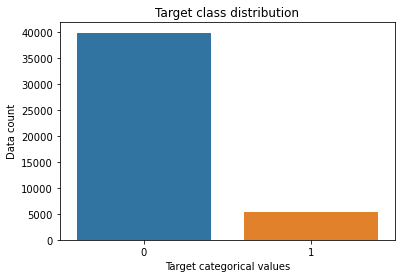

In [10]:
sns.countplot(df_proj['target_cat']).set(ylabel = "Data count", xlabel = "Target categorical values")
plt.title('Target class distribution')

From the graph above, it shows that the class distribution from data is really imbalance, so it is necessary to resampling the data to balance the distribution of classes in the dataset.

### Balancing the dataset

There are 2 ways of resampling:
1. Random Oversampling: Randomly duplicate examples in the minority class.
2. Random Undersampling: Randomly delete examples in the majority class.

In this project I will do the resampling process with the Random Oversampling method.

In [11]:
# Class count
count_class_0, count_class_1 = df_proj.target_cat.value_counts()

# Divide by class
df_proj_0 = df_proj[df_proj['target_cat'] == 0]
df_proj_1 = df_proj[df_proj['target_cat'] == 1]

In [12]:
df_proj_1_over = df_proj_1.sample(count_class_0, replace=True)
df_proj_new = pd.concat([df_proj_0, df_proj_1_over], axis=0)

C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target class distribution')

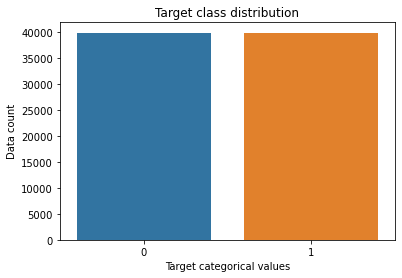

In [96]:
sns.countplot(df_proj_new['target_cat']).set(ylabel = "Data count", xlabel = "Target categorical values")
plt.title('Target class distribution')

In [94]:
df_proj_new.shape

(79844, 10)

From the graph above, it shows that the class distribution in the data is balanced.

### Numerical and Categorical Features

In [14]:
numerical = ['age', 'balance', 'campaign', 'previous']
categorical = ['marital', 'job', 'default', 'housing', 'loan'] 

### Check unique value in categorical features

In [15]:
df_proj_new[categorical].nunique()

marital     3
job        12
default     2
housing     2
loan        2
dtype: int64

### Numerical data description

In [93]:
df_proj_new[numerical].describe()

,age,balance,campaign,previous
count,79844.000000,79844.000000,79844.000000,79844.000000
mean,41.232290,1548.476379,2.496944,0.835216
std,11.962289,3262.942642,2.668540,2.394031
min,18.000000,-8019.000000,1.000000,0.000000
25%,32.000000,123.000000,1.000000,0.000000
50%,39.000000,556.000000,2.000000,0.000000
75%,49.000000,1730.000000,3.000000,1.000000
max,95.000000,102127.000000,63.000000,275.000000


### Visualize numerical features

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_1456/3518015900.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_proj_new.hist(bins=100, ax=ax, layout=(2, 2),
C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


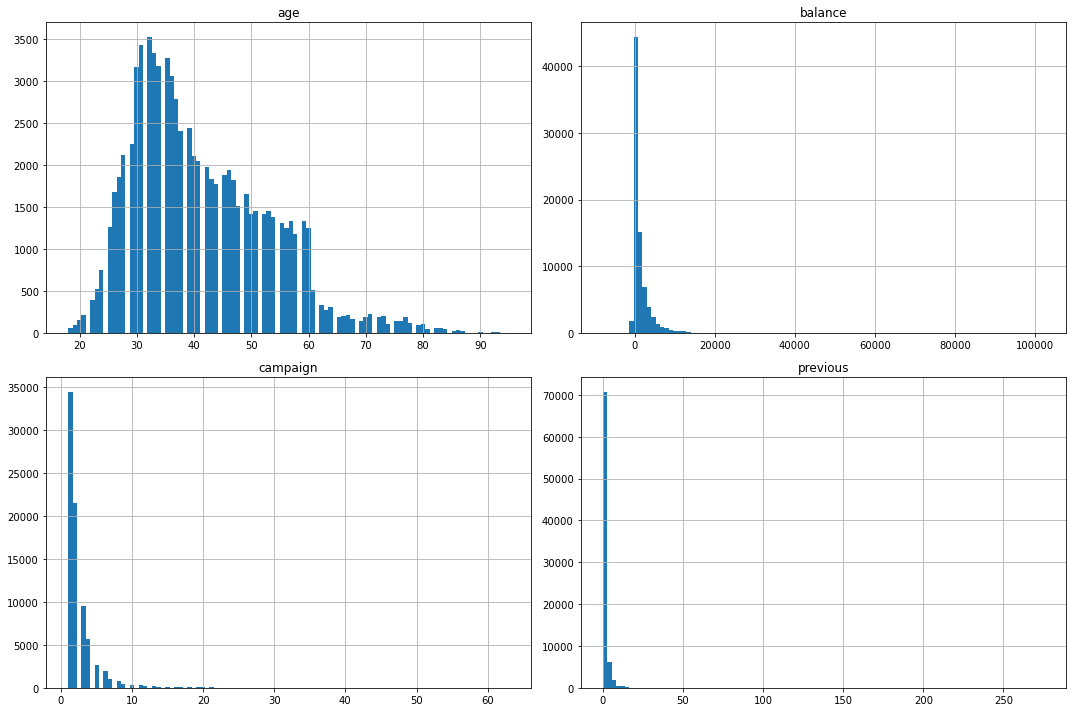

In [16]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df_proj_new.hist(bins=100, ax=ax, layout=(2, 2), 
             column=numerical)
plt.tight_layout()
plt.show()

## Split Dataset Train/Val/Test (60%/20%/20%)
----------

In [17]:
#80% Full Train, 20% Test
df_full_train, df_test = train_test_split(df_proj_new, test_size=0.2, random_state=15)
#60% Train, 20% Val (25% from Full Train -> 20%/80%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=15)

In [18]:
print('Train Full:', len(df_full_train), 
      '(', round((len(df_full_train)/len(df_proj_new))*100, 2), '%)') 
print('Train:', len(df_train), 
      '(', round((len(df_train)/len(df_proj_new))*100, 2), '%)') 
print('Validation:', len(df_val), 
      '(', round((len(df_val)/len(df_proj_new))*100, 2), '%)') 
print('Test:', len(df_test), 
      '(', round((len(df_test)/len(df_proj_new))*100, 2), '%)') 

Train Full: 63875 ( 80.0 %)
Train: 47906 ( 60.0 %)
Validation: 15969 ( 20.0 %)
Test: 15969 ( 20.0 %)


In [20]:
y_train = df_train.target_cat.values
y_val = df_val.target_cat.values
y_test = df_test.target_cat.values

## Features Importances
---------------------
What I do in this part:
+ View Mutual Info Score for Categorical Features of full train data
+ Use Correlation Matrix to see correlation between features and target in train data and visualize it using heatmap

### Mutual Info Score

In [21]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.target_cat)

In [22]:
mi_scores = df_full_train[categorical].apply(mutual_info_target_score)
mi_scores.sort_values(ascending=False).round(4).to_frame(name='Mutual Info')

,Mutual Info
housing,0.0237
job,0.0194
loan,0.0070
marital,0.0051
default,0.0006


From the mutual info score result, I got information that from the five categorical features, the `'housing'` feature or information on whether the prospective customer has a housing loan or not is the most important feature.

### Correlation Matrix with Heatmap

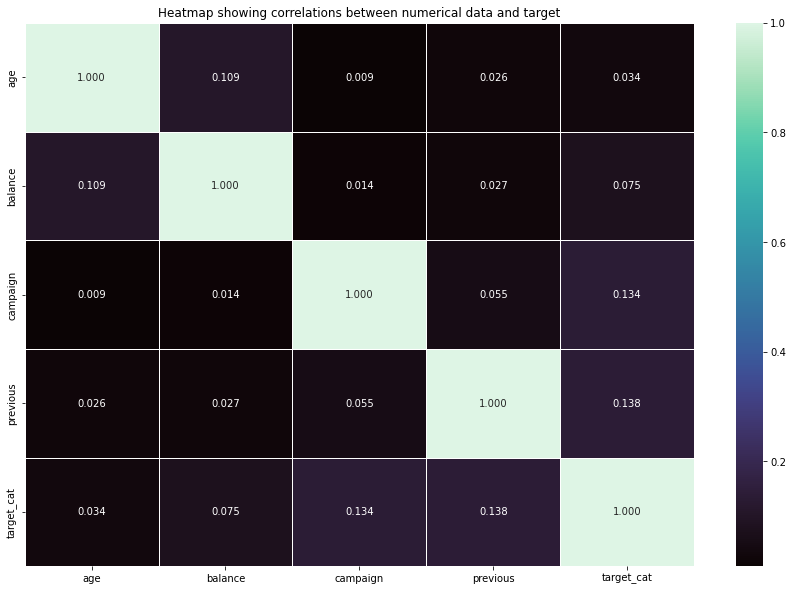

In [23]:
corr = df_full_train.corr().abs()

plt.figure(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='mako', fmt='.3f', linewidths=1, linecolor='White')
plt.title('Heatmap showing correlations between numerical data and target')
plt.show()

The information obtained from the correlation matrix of the numerical features above is that the `'age'` feature and the `'balance'` feature have a strong correlation in this data compared to the correlation between other features, and also the `'previous'` feature and `'target_cat'` have strong correlation.

## OHE with DictVectorizer()
------------

In [24]:
def OHE_DV(df, dv, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.fit_transform(dicts)
    
    return X_data
#-------------------------------------------------------#
def OHE_DV_wo_fit(df, dv, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.transform(dicts)
    
    return X_data

In [26]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_train = OHE_DV(df_train, dv, X_col)
X_val = OHE_DV_wo_fit(df_val, dv, X_col)

X_train.shape, X_val.shape

((47906, 25), (15969, 25))

## Matrix for XGBoost
--------

In [27]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

# Choose Model
----------
For this midterm project there are a few model for classification that I used:
+ `LogisticRegression()`
+ `DecisionTreeClassifier()`
+ `RandomForestClassifier()`
+ `XGBoost()`

The best parameter and model will be selected based on the best performance of the model seen from AUC score of the validation data for each trained model.

## Logistic Regression
--------

### Tuning `C` rameter for `LogisticRegression()`

In [28]:
scores = []
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_val = model.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred_val).round(3)
    
    y_pred_train = model.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_pred_train).round(3)
    
    print('C = %5s | AUC-train = %.3f | AUC-val = %.3f' % (C, auc_train, auc_val))

C = 0.001 | AUC-train = 0.703 | AUC-val = 0.707
C =  0.01 | AUC-train = 0.703 | AUC-val = 0.708
C =   0.1 | AUC-train = 0.702 | AUC-val = 0.708
C =     1 | AUC-train = 0.702 | AUC-val = 0.708
C =    10 | AUC-train = 0.702 | AUC-val = 0.708
C =   100 | AUC-train = 0.702 | AUC-val = 0.708


From the AUC for train and validation the best `C` for Logistic Regression model is 0.01

## Decision Tree
-----

### Tuning `max_depth` parameter for `DecisionTree()`

In [29]:
for md in [1, 2, 3 ,4, 5, 6, 7, 8, 9, 10]:
    
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    y_pred_train = dt.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred_train)
    
    print('max_dept = %2s | AUC_train = %.3f | AUC_val = %.3f' % (md, auc_train, auc))

max_dept =  1 | AUC_train = 0.602 | AUC_val = 0.600
max_dept =  2 | AUC_train = 0.661 | AUC_val = 0.658
max_dept =  3 | AUC_train = 0.683 | AUC_val = 0.683
max_dept =  4 | AUC_train = 0.700 | AUC_val = 0.699
max_dept =  5 | AUC_train = 0.717 | AUC_val = 0.714
max_dept =  6 | AUC_train = 0.729 | AUC_val = 0.724
max_dept =  7 | AUC_train = 0.741 | AUC_val = 0.732
max_dept =  8 | AUC_train = 0.756 | AUC_val = 0.743
max_dept =  9 | AUC_train = 0.771 | AUC_val = 0.753
max_dept = 10 | AUC_train = 0.791 | AUC_val = 0.769


From the AUC for train and validation the best `max_depth` is between 7 to 10.

### Tuning `min_samples_leaf` parameter for `DecisionTree()`

In [30]:
scores = []

for depth in [7, 8, 9, 10]:
    for s in [1, 5, 10, 15, 20, 25, 100, 200, 250, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        y_pred_train = dt.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)    
        
        scores.append((depth, s, auc_train, auc))

In [31]:
columns = ['max_depth', 'min_samples_leaf', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns=['max_depth'], 
                                  values=['AUC_train', 'AUC_val'])
df_scores_pivot.round(3)

AUC_train                      AUC_val                     
max_depth               7      8      9      10      7      8      9      10
min_samples_leaf                                                            
1                    0.741  0.756  0.771  0.791   0.732  0.743  0.753  0.769
5                    0.741  0.755  0.769  0.788   0.731  0.741  0.751  0.765
10                   0.740  0.754  0.768  0.786   0.731  0.741  0.749  0.761
15                   0.739  0.753  0.767  0.784   0.731  0.741  0.749  0.762
20                   0.739  0.752  0.766  0.781   0.731  0.741  0.748  0.759
25                   0.738  0.751  0.764  0.778   0.730  0.739  0.746  0.757
100                  0.735  0.745  0.753  0.759   0.728  0.735  0.740  0.745
200                  0.732  0.739  0.744  0.747   0.724  0.730  0.731  0.734
250                  0.731  0.737  0.743  0.745   0.724  0.728  0.731  0.732
500                  0.727  0.730  0.732  0.733   0.723  0.725  0.727  0.727

The table above shows that the best AUC score is generated from `'max_depth'` = 10 and `'min_samples_leaf'` = 1.

## Random Forest
------

### Tuning `random_state` parameter for `RandomForestClassifier()`

In [32]:
scores = []
for r in [1, 3, 5, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)
        
        scores.append((n, r, auc_train, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'random_state',
                                          'AUC_train', 'AUC_val'])

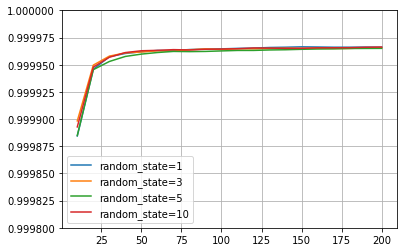

In [66]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset['AUC_train'],
             label='random_state=%d' % r)
    plt.ylim(0.9998, 1)
plt.legend()
plt.grid()

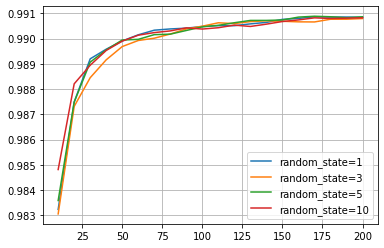

In [73]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='random_state=%d' % r)

plt.legend()
plt.grid()

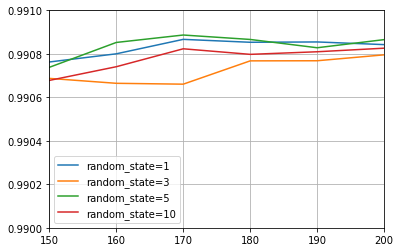

In [78]:
for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='random_state=%d' % r)
    plt.ylim(0.990, 0.991)
    plt.xlim(150, 200)
    
plt.legend()
plt.grid()

From the graphs above, it shows that `'random_state'` = 3 give the best performance compared to the other value. Therefore, `'random_state'` = 3 chosen to be the best parameter. 

### Tuning `max_depth` parameter for `RandomForestClassifier()`

In [81]:
r = 3
scores = []

for d in [5, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)        

        scores.append((d, n, auc_train, auc))

In [82]:
columns = ['max_depth', 'n_estimators', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

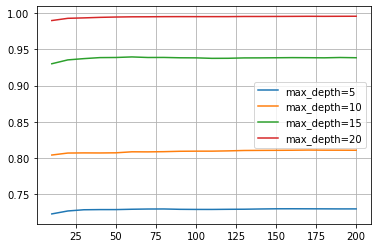

In [83]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_train,
             label='max_depth=%d' % d)

plt.legend()
plt.grid()

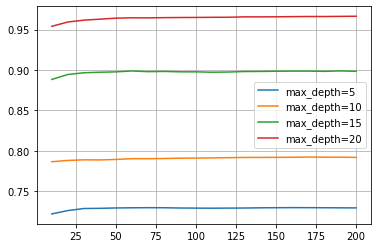

In [84]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='max_depth=%d' % d)

plt.legend()
plt.grid()

From the graphs above, it shows that `'max_depth'` = 20 give the best performance compared to the other value. Therefore, `'max_depth'` = 20 chosen to be the best parameter. 

### Tuning `min_samples_leaf` parameter for `RandomForestClassifier()`

In [85]:
max_depth = 20
r = 3
scores = []

for s in [1, 3, 5, 10, 50, 100]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train) 
        
        scores.append((s, n, auc_train, auc))

In [86]:
columns = ['min_samples_leaf', 'n_estimators', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

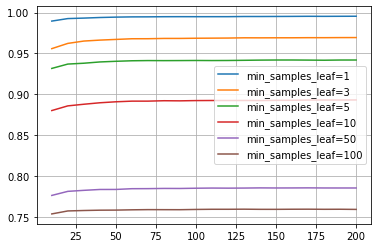

In [87]:
for s in [1, 3, 5, 10, 50, 100]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_train,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.grid()

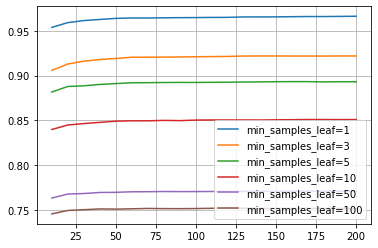

In [88]:
for s in [1, 3, 5, 10, 50, 100]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.grid()

From the graphs above, it shows that `'min_samples_leaf'` = 1 give the best performance compared to the other value. Therefore, `'min_samples_leaf'` = 1 chosen to be the best parameter. 

### Tuning `max_features` parameter for `RandomForestClassifier()`

In [89]:
scores = []
r = 3 
max_depth = 20
s = 1

for f in [1, 3, 5, 10, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    max_features=f,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        y_pred_train = rf.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_pred_train)
        
        scores.append((f, n, auc_train, auc))

In [90]:
columns = ['max_features', 'n_estimators', 'AUC_train', 'AUC_val']
df_scores = pd.DataFrame(scores, columns=columns)

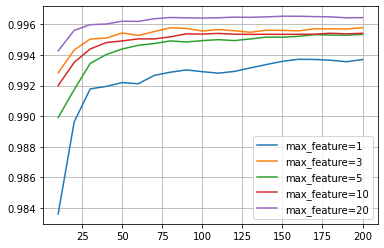

In [91]:
for f in [1, 3, 5, 10, 20]:
    df_subset = df_scores[df_scores.max_features == f]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_train,
             label='max_feature=%d' % f)

plt.legend()
plt.grid()

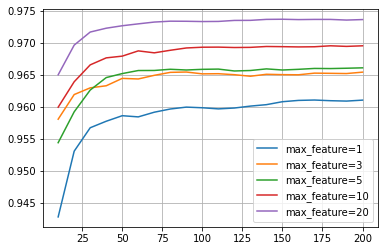

In [92]:
for f in [1, 3, 5, 10, 20]:
    df_subset = df_scores[df_scores.max_features == f]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC_val,
             label='max_feature=%d' % f)

plt.legend()
plt.grid()

From the graphs above, it shows that `'max_features'` = 20 give the best performance compared to the other value. Therefore, `'max_features'` = 20 chosen to be the best parameter. 

## XGBoost
----

In [35]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [36]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

### Tuning `eta` parameter for `XGBoost()`

In [37]:
scores_eta = {}

In [46]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [47]:
key = 'eta=%s' % (xgb_params['eta'])
scores_eta[key] = parse_xgb_output(output)
scores_eta.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5'])

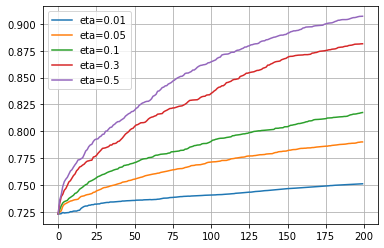

In [48]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5']
#etas = ['eta=0.01', 'eta=0.05', 'eta=0.1']

for eta in etas:
    df_score = scores_eta[eta]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

    plt.grid()
    plt.legend()

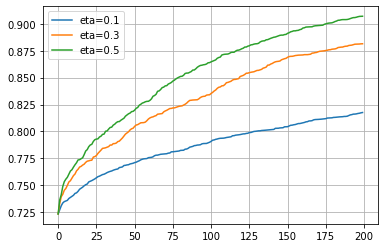

In [50]:
etas = ['eta=0.1', 'eta=0.3', 'eta=0.5']

for eta in etas:
    df_score = scores_eta[eta]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

    plt.grid()
    plt.legend()

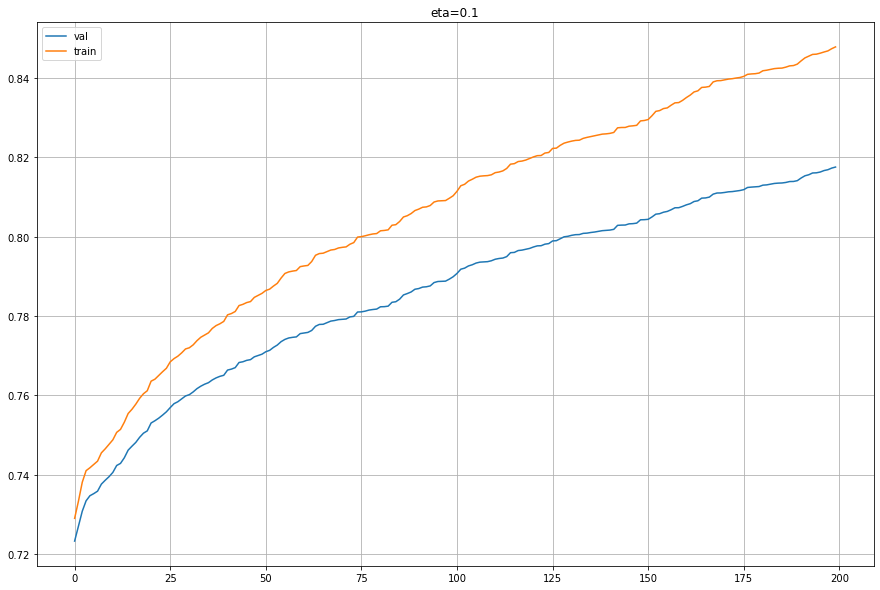

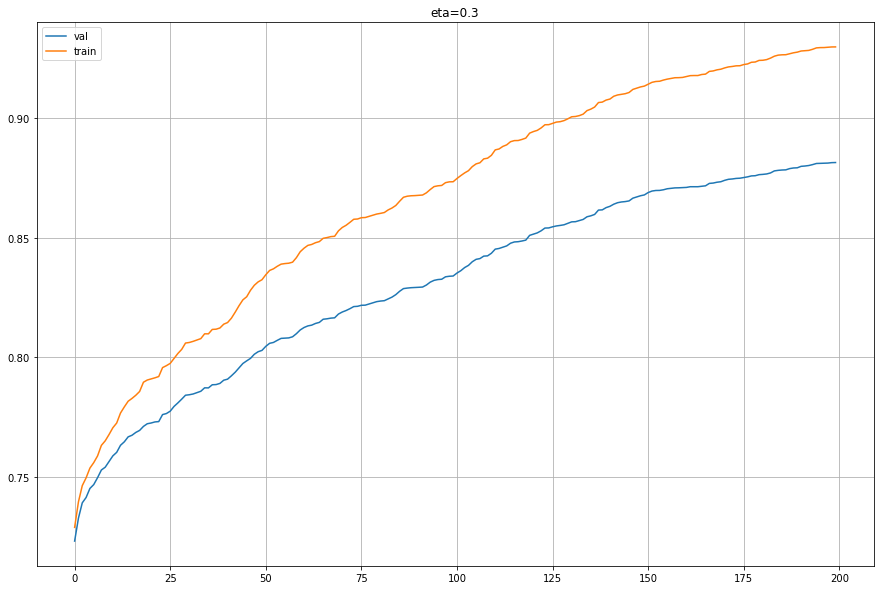

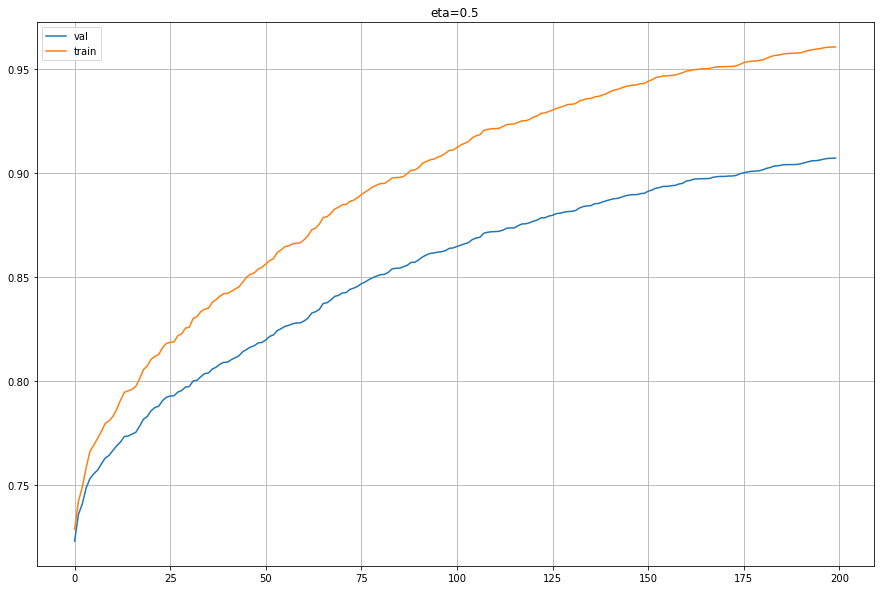

In [51]:
for eta in etas:
    df_score = scores_eta[eta]
    
    plt.figure(figsize=(15, 10))
    plt.title(eta)
    #plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

From the graphs above, it shows that `'eta'` = 0.5 give the best performance compared to the other value. Therefore, `'eta'` = 0.5 chosen to be the best parameter. 

### Tuning `max_depth` parameter for `XGBoost()`

In [99]:
scores_md = {}

In [106]:
%%capture output
eta = 0.5

xgb_params = {
    'eta': eta, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [107]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores_md[key] = parse_xgb_output(output)
scores_md.keys()

dict_keys(['max_depth=1', 'max_depth=3', 'max_depth=6', 'max_depth=10'])

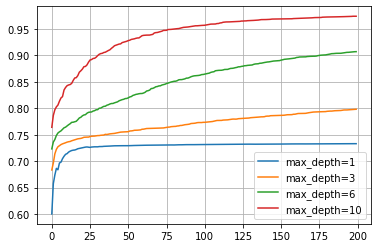

In [119]:
max_dept = ['max_depth=1', 'max_depth=3', 'max_depth=6', 'max_depth=10']

for d in max_dept:
    df_score = scores_md[d]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)
    
plt.grid()
plt.legend()

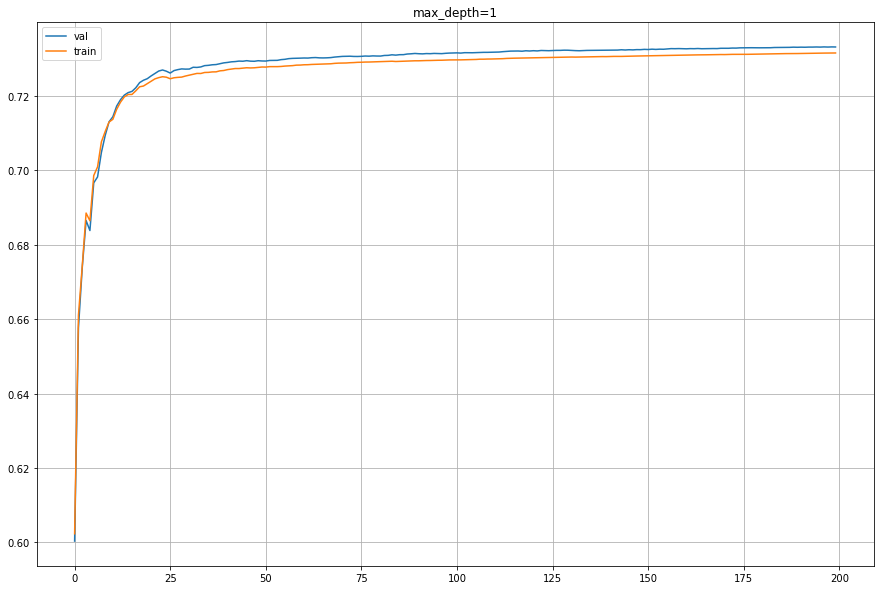

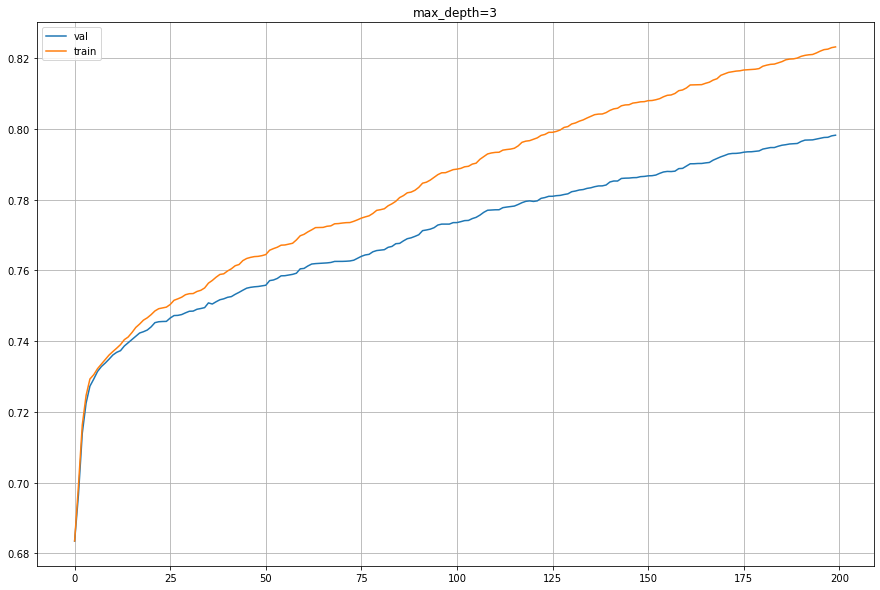

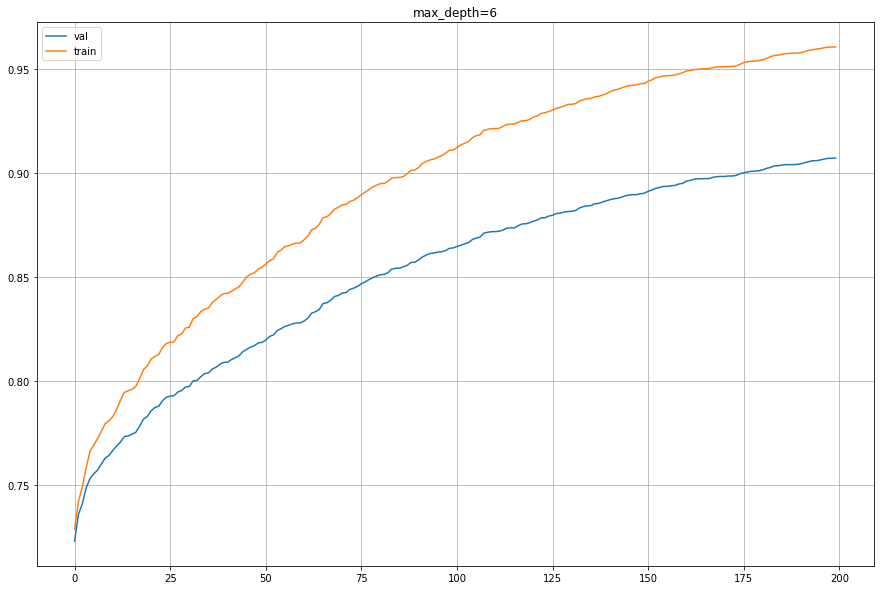

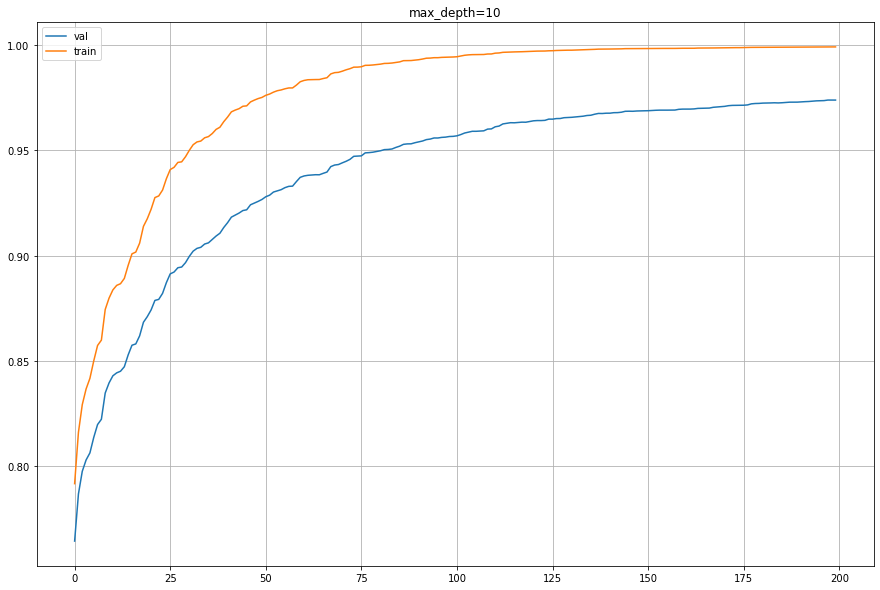

In [116]:
for d in max_dept:
    df_score = scores_md[d]
    
    plt.figure(figsize=(15, 10))
    plt.title(d)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

From the graphs above, it shows that `'max_depth'` = 10 give the best performance compared to the other value. Therefore, `'max_depth'` = 10 chosen to be the best parameter. 

### Tuning `min_child_weight` parameter for `XGBoost()`

In [120]:
scores_mcw = {}

In [131]:
%%capture output
eta = 0.5
d = 10

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [132]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores_mcw[key] = parse_xgb_output(output)
scores_mcw.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=30'])

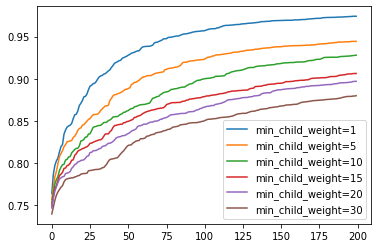

In [133]:
mcw = ['min_child_weight=1', 'min_child_weight=5','min_child_weight=10',
       'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=30']

for w in mcw:
    df_score = scores_mcw[w]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=w)
    plt.grid()
    plt.legend()    

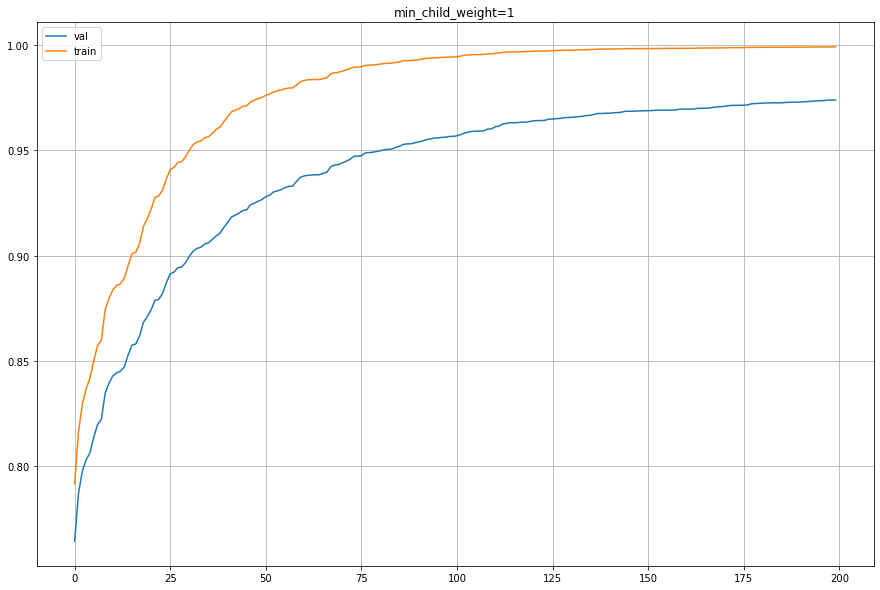

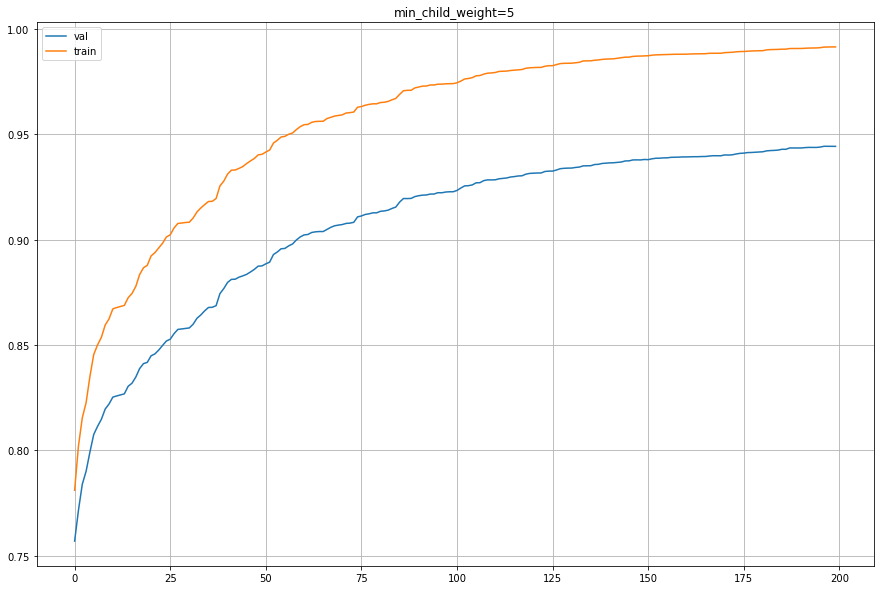

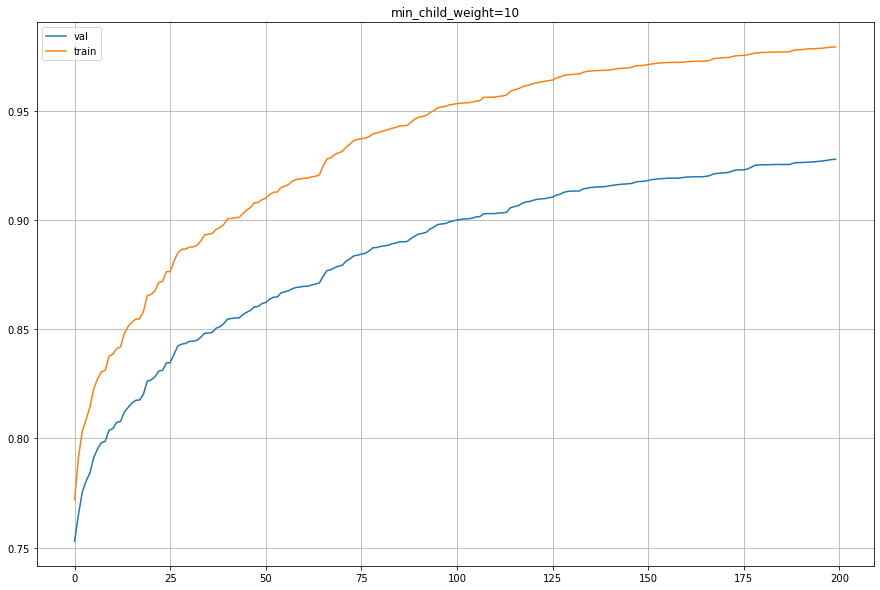

In [135]:
mcw = ['min_child_weight=1', 'min_child_weight=5',
       'min_child_weight=10']
for w in mcw:
    df_score = scores_mcw[w]
    
    plt.figure(figsize=(15, 10))
    plt.title(w)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

From the graphs above, it shows that `'min_child_weight'` = 1 give the best performance compared to the other value. Therefore, `'min_child_weight'` = 1 chosen to be the best parameter. 

## Final Model
----

In [136]:
C = 0.01
model_1 = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

In [137]:
depth = 10
s = 1
model_2 = dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)

In [138]:
r = 3 
max_depth = 20
s = 1
f = 10
n = 200
model_3 = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    max_features=f,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)

In [139]:
eta = 0.5
d = 10
w = 1

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': w,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.79141	val-auc:0.76407
[1]	train-auc:0.81586	val-auc:0.78652
[2]	train-auc:0.82901	val-auc:0.79728
[3]	train-auc:0.83648	val-auc:0.80268
[4]	train-auc:0.84155	val-auc:0.80606
[5]	train-auc:0.84982	val-auc:0.81341
[6]	train-auc:0.85718	val-auc:0.81954
[7]	train-auc:0.85973	val-auc:0.82206
[8]	train-auc:0.87432	val-auc:0.83455
[9]	train-auc:0.87971	val-auc:0.83934
[10]	train-auc:0.88362	val-auc:0.84274
[11]	train-auc:0.88579	val-auc:0.84415
[12]	train-auc:0.88659	val-auc:0.84492
[13]	train-auc:0.88910	val-auc:0.84706
[14]	train-auc:0.89530	val-auc:0.85269
[15]	train-auc:0.90081	val-auc:0.85730
[16]	train-auc:0.90165	val-auc:0.85793
[17]	train-auc:0.90589	val-auc:0.86176
[18]	train-auc:0.91389	val-auc:0.86824
[19]	train-auc:0.91749	val-auc:0.87090
[20]	train-auc:0.92202	val-auc:0.87411
[21]	train-auc:0.92759	val-auc:0.87864
[22]	train-auc:0.92837	val-auc:0.87913
[23]	train-auc:0.93117	val-auc:0.88199
[24]	train-auc:0.93658	val-auc:0.88711
[25]	train-auc:0.94092	val-auc:0.89

In [140]:
model = [model_1, model_2, model_3, model_4]
name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
q = 0
auc_score = []
for m in model:
    mod = m
    if mod == model_4:
        y_pred = mod.predict(dval)
        auc = roc_auc_score(y_val, y_pred)
    else:
        mod.fit(X_train, y_train)
        y_pred = mod.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
    auc_score.append((name[q], auc.round(3)))    
    q = q+1

In [141]:
columns = ['Model', 'AUC_scores']
df_scores = pd.DataFrame(auc_score, columns=columns)
df_scores

,Model,AUC_scores
0,Logistic Regression,0.708
1,Decision Tree,0.769
2,Random Forest,0.970
3,XGBoost,0.974


## Train Best Model
-------
From all of the model that have been trained, it's shows that `'XGBoost'` model gives the best performances from the AUC scores on validation dataset. Therefore, the final model that I will use in this midterm project is `'XGBoost'` model.

In [142]:
y_full_train = df_full_train.target_cat.values

del df_full_train['target_cat']

In [143]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_full_train = OHE_DV(df_full_train, dv, X_col)
X_test = OHE_DV_wo_fit(df_test, dv, X_col)

X_full_train.shape, X_test.shape

((63875, 25), (15969, 25))

In [150]:
features = dv.get_feature_names()
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [151]:
eta = 0.5
d = 10
w = 1

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': w,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model_final = xgb.train(xgb_params, dfull_train, num_boost_round=200)

In [153]:
model = model_final

y_pred = mod.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
print(f'Final Model = {name[3]} -> AUC Score = {auc.round(3)}')

Final Model = XGBoost -> AUC Score = 0.973
